In [1]:
from netCDF4 import Dataset, MFDataset
import numpy as np
import matplotlib.pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
import pickle

### Plot Figure 3, panel b)

In [2]:
pickle.HIGHEST_PROTOCOL

5

In [3]:
with open('../data/data_Fig3b.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data_Figure3b = pickle.load(f)

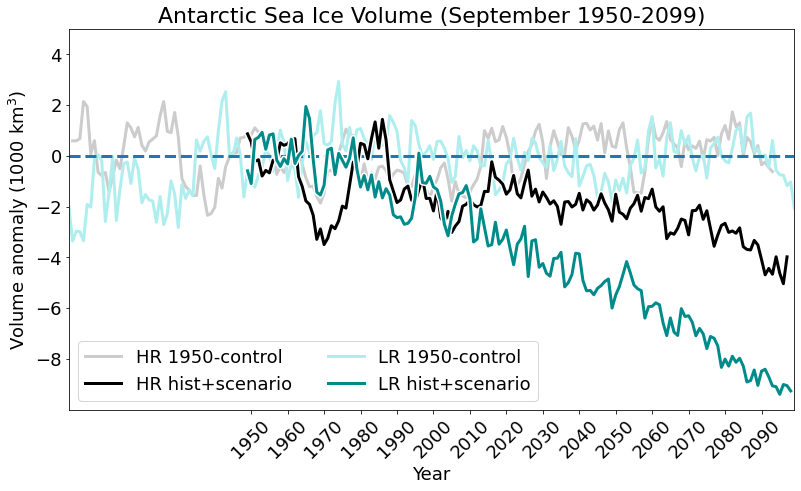

In [4]:
#-- plot everything together
fig=plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)

#---- HR ---------------------------------
EXP='HR'
plt.plot(data_Figure3b[EXP]['spinup-time'], data_Figure3b[EXP]['spinup-data'], color='0.8',linewidth=3.)
plt.plot(data_Figure3b[EXP]['control-time'], data_Figure3b[EXP]['control-data'], color='0.8',linewidth=3.,label='HR 1950-control', zorder=1)
plt.plot(data_Figure3b[EXP]['scenario-time'], data_Figure3b[EXP]['scenario-data'], color='black',linewidth=3.,label='HR hist+scenario', zorder=4)
plt.plot(data_Figure3b[EXP]['scenario-time'], data_Figure3b[EXP]['scenario-data'], color='white',linewidth=6., zorder=3)

#---- LR ---------------------------------
EXP='LR'
plt.plot(data_Figure3b[EXP]['spinup-time'], data_Figure3b[EXP]['spinup-data'], color='paleturquoise',linewidth=3.)
plt.plot(data_Figure3b[EXP]['control-time'], data_Figure3b[EXP]['control-data'], color='paleturquoise',linewidth=3.,label='LR 1950-control', zorder=2)
plt.plot(data_Figure3b[EXP]['scenario-time'], data_Figure3b[EXP]['scenario-data'], color='darkcyan',linewidth=3.,label='LR hist+scenario', zorder=6)
plt.plot(data_Figure3b[EXP]['scenario-time'], data_Figure3b[EXP]['scenario-data'], color='white',linewidth=6., zorder=5)

# zero line ------------------------------
plt.plot(np.arange(0,200,1), np.zeros_like(np.arange(0,200,1)), linestyle='--', linewidth=3.)

# ----------------------------------------
plt.ylabel('Volume anomaly (1000 km$^3$)',fontsize=18)
plt.xlabel('Year',fontsize=18)

plt.xticks(np.arange(50,200,10),np.arange(1950,2098,10),fontsize=18,rotation=45)
plt.axis([0.0,199,-10.,5.]) # [xmin, xmax, ymin, ymax]
plt.yticks(np.arange(-8,6,2), fontsize = 18)

plt.title('Antarctic Sea Ice Volume (September 1950-2099)',fontsize=22)
plt.legend(loc='lower left', ncol=2, fontsize=18)
plt.show()

In [5]:
saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure3b.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()